# Lab 5 - Introduction to Numeric Methods for ODEs
## BIOS 26210 (fall 2022)
### solutions

In [1]:
#Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities

## Part 1: Forward Euler implementation

The ODE model of membrane potential with only one ionic species and no applied current has the following form:

$$ \frac{dV}{dt} = \frac{g}{C} (V_R -V) $$

Where $C$ is the membrane capacitance, $g$ is the conductance of ion channels, and $V_R$ is the reversal (Nernst) potential of the specific ionic species. Let $C = 0.05$, $g=0.02$ and $V_R = 60$ (in mV it is the reversal potential of Na+ ions). 

### 1.1 Numeric solutions using FE

Implement the Forward Euler method for this ODE inside a function that has the following inputs and outputs:

* INPUTS: C, g, VR, V0 (initial value), dt (time step), Tmax (time duration)
* OUTPUTS: time (vector array), V (vector array)

Self-check: using the above given parameters with $dt = 0.1$, $V_0 = 100$ and $Tmax = 5$, the final value of $V$ should be close to 65.412.


In [58]:
def forward_euler_mempot(C, g, VR, V0, dt, Tmax): #Input parameters
    Niter = int(np.ceil(Tmax/dt)) #Find the number of iterations
    V = np.zeros(Niter) #Create solution array
    V[0] = V0 #set the initial value
    t = np.linspace(0,Tmax,Niter) #Create time array
    for i in np.arange(Niter-1):
        V[i+1] = V[i] + (g/C)*(VR - V[i])*dt #Run a for loop to calculate the numerical solution of the ODE
    return t, V #Return time vector and numerical solution vector

#Define parameters
C = .05
g = .02
VR = 60 #mV, reversal potential of Na+ ions
V0 = 100
Tmax = 5
dt = .01

t, V = forward_euler_mempot(C, g, VR, V0, dt, Tmax)
print('The final value of membrane potential is ' + str(V[499]) + ' mV')

The final value of membrane potential is 65.41339683576867 mV


### 1.2 Plot of solutions

Produce a plot of multiple solutions starting with different initial values $V_0$ to illustrate the dynamics of solutions. Choose a good time step and maximum time to illustrate the convergence of all solutions. Add an informative legend and title to the plot.

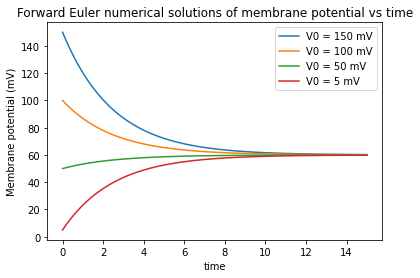

In [59]:
#INITIAL VALUE V0 = 150
dt = .01 #Time step = .01
V0 = 150
Tmax = 15
t, V = forward_euler_mempot(C, g, VR, V0, dt, Tmax)
plt.plot(t, V, label = 'V0 = ' + str(V0) + ' mV')
plt.xlabel ('time')
plt.ylabel('Membrane potential (mV)')
plt.title('Forward Euler numerical solutions of membrane potential vs time')

#INITIAL VALUE V0 = 100
V0 = 100
t, V = forward_euler_mempot(C, g, VR, V0, dt, Tmax)
plt.plot(t, V, label = 'V0 = ' + str(V0) + ' mV')

#INITIAL VALUE V0 = 50
V0 = 50
t, V = forward_euler_mempot(C, g, VR, V0, dt, Tmax)
plt.plot(t, V, label = 'V0 = ' + str(V0) + ' mV')

#INITIAL VALUE V0 = 5
V0 = 5
t, V = forward_euler_mempot(C, g, VR, V0, dt, Tmax)
plt.plot(t, V, label = 'V0 = ' + str(V0) + ' mV')

plt.legend()
plt.show()

### 1.3 FE for the logistic ODE

The logistic model of population is described by the following ODE:

$$ \frac{dP}{dt} = r(1-\frac{P}{K}) P $$

where $P$ is population size, $t$ is time, and the parameters $r$ and $K$ represent the instinsic growth rate and carrying capacity, respectively.

Implement the Forward Euler method for the logistic ODE inside a function that has the following inputs and outputs:

* INPUTS: r, K, P0 (initial value), dt (time step), Tmax (time duration)
* OUTPUTS: time (vector array), P (vector array)

Self-check: using the above given parameters with  $K=5000$ and $r=0.1$, $dt = 1$, $P_0 = 10$ and $Tmax = 5$, the final value of $P$ should be close to 14.629. 

In [60]:
def forward_euler_logpop(r, K, P0, dt, Tmax): #Input parameters
    Niter = int(np.ceil(Tmax/dt)) #Find the number of iterations
    P = np.zeros(Niter) #Create solution array
    P[0] = P0 #set the initial value
    t = np.linspace(0,Tmax,Niter) #Create time array
    for i in np.arange(Niter-1):
        P[i+1] = P[i] + r*P[i]*(1 - P[i]/K)*dt #Run a for loop to calculate the numerical solution of the ODE
    return t, P #Return time vector and numerical solution vector

#Define parameters
r = .1
K = 5000
P0 = 10
Tmax = 5
dt = 1

t, P = forward_euler_logpop(r, K, P0, dt, Tmax)
print('The final population size is ' + str(P[4]))

The final population size is 14.628653443096221


### 1.4 plotting the solutions

Produce a plot of multiple solutions using the forward Euler function, starting with different initial values $P_0$ to illustrate the dynamics of solutions. Choose a time step dt that results in smooth solution curve and sufficient maximum time to illustrate the convergence of all solutions. Add an informative legend and title to the plot.

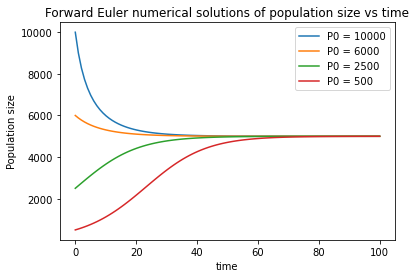

In [62]:
#INITIAL VALUE P0 = 10000
dt = 1 #Time step = 1
P0 = 10000
Tmax = 100
t, P = forward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'P0 = ' + str(P0))
plt.xlabel ('time')
plt.ylabel('Population size')
plt.title('Forward Euler numerical solutions of population size vs time')

#INITIAL VALUE P0 = 6000
P0 = 6000
t, P = forward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'P0 = ' + str(P0))

#INITIAL VALUE P0 = 2500
P0 = 2500
t, P = forward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'P0 = ' + str(P0))

#INITIAL VALUE P0 = 500
P0 = 500
t, P = forward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'P0 = ' + str(P0))

plt.legend()
plt.show()

## Part 2: Backward Euler implementation

### 2.1 BE for Cole ODE

Implement the Backward Euler method for the same Cole membrane ODE in a similar function as in part 1, with the following requirements:

* INPUTS: C, g, VR, V0 (initial value), dt (time step), Tmax (time duration)
* OUTPUTS: time (vector array), V (vector array)

Self-check: using the above given parameters with $dt = 0.1$, $V_0 = 100$ and $Tmax = 5$, the final value of $V$ should be close to 65.853.

In [63]:
def backward_euler_mempot(C, g, VR, V0, dt, Tmax): #Input parameters
    Niter = int(np.ceil(Tmax/dt)) #Find the number of iterations
    V = np.zeros(Niter) #Create solution array
    V[0] = V0 #set the initial value
    t = np.linspace(0,Tmax,Niter) #Create time array
    for i in np.arange(Niter-1):
        V[i+1] = (V[i] + dt*(g/C)*VR)/(1 + dt*(g/C)) #this is the BE step
    return t, V #Return time vector and numerical solution vector

#Define parameters
C = .05
g = .02
VR = 60 #mV, reversal potential of Na+ ions
V0 = 100
Tmax = 5
dt = .1

t, V = backward_euler_mempot(C, g, VR, V0, dt, Tmax)
print('The final value of membrane potential is ' + str(V[49]) + ' mV')

The final value of membrane potential is 65.85364479786286 mV


### 2.2 Plotting the solutions

Produce a plot of multiple solutions using the Backward Euler function for the Cole model using the same parameter values, starting with different initial values $V_0$ to illustrate the dynamics of solutions. Choose a time step so that solutions are smooth and sufficient maximum time to illustrate convergence of all solutions. Add an informative legend and title to the plot.

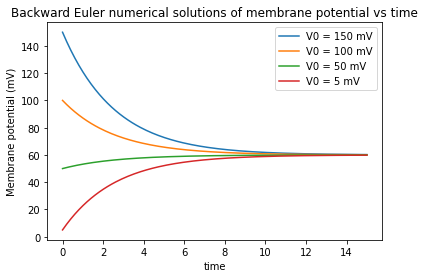

In [64]:
#INITIAL VALUE V0 = 150
dt = .1 #Time step of .1
V0 = 150
Tmax = 15
t, V = backward_euler_mempot(C, g, VR, V0, dt, Tmax)
plt.plot(t, V, label = 'V0 = ' + str(V0) + ' mV')
plt.xlabel ('time')
plt.ylabel('Membrane potential (mV)')
plt.title('Backward Euler numerical solutions of membrane potential vs time')

#INITIAL VALUE V0 = 100
V0 = 100
t, V = backward_euler_mempot(C, g, VR, V0, dt, Tmax)
plt.plot(t, V, label = 'V0 = ' + str(V0) + ' mV')

#INITIAL VALUE V0 = 50
V0 = 50
t, V = backward_euler_mempot(C, g, VR, V0, dt, Tmax)
plt.plot(t, V, label = 'V0 = ' + str(V0) + ' mV')

#INITIAL VALUE V0 = 5
V0 = 5
t, V = backward_euler_mempot(C, g, VR, V0, dt, Tmax)
plt.plot(t, V, label = 'V0 = ' + str(V0) + ' mV')

plt.legend()
plt.show()

### 2.3 BE for the logistic ODE

Implement the Backward Euler method for the logistic ODE inside a function that has the following inputs and outputs:

* INPUTS: r, K, P0 (initial value), dt (time step), Tmax (time duration)
* OUTPUTS: time (vector array), P (vector array)

Self-check: using the above given parameters with  $K=5000$ and $r=0.1$, $dt = 1$, $P_0 = 10$ and $Tmax = 5$, the final value of $P$ should be close to 15.224. 

In [82]:
def backward_euler_logpop(r, K, P0, dt, Tmax): #Input parameters
    Niter = int(np.ceil(Tmax/dt)) #Find the number of iterations
    P = np.zeros(Niter) #Create solution array
    P[0] = P0 #set the initial value
    t = np.linspace(0,Tmax,Niter) #Create time array
    for i in np.arange(Niter-1):
        P[i+1] = (-1+dt*r+((1-dt*r)**2-4*(-dt*r*P[i]/K))**.5)/(2*dt*r/K) #Backward Euler
    return t, P #Return time vector and numerical solution vector

#Define parameters
r = .1
K = 5000
P0 = 10
Tmax = 5
dt = 1

t, P = backward_euler_logpop(r, K, P0, dt, Tmax)
print('The final population size is ' + str(P[4]))

The final population size is 15.223851585721702


### 2.4 plotting the solutions

Produce a plot of multiple solutions of the logistic model using the Backward Euler function, using the same parameters and starting with different initial values $P_0$ to illustrate the dynamics of solutions. Choose a time step dt that results in smooth solution curve and sufficient maximum time to illustrate the convergence of all solutions. Add an informative legend and title to the plot.

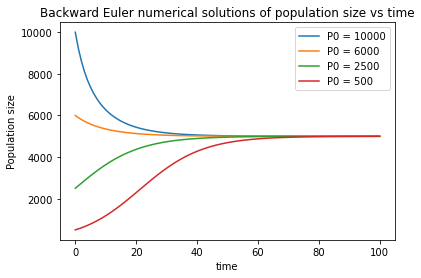

In [85]:
#INITIAL VALUE P0 = 10000
dt = 1 #Time step = 1
P0 = 10000
Tmax = 100
t, P = backward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'P0 = ' + str(P0))
plt.xlabel ('time')
plt.ylabel('Population size')
plt.title('Backward Euler numerical solutions of population size vs time')

#INITIAL VALUE P0 = 6000
P0 = 6000
t, P = backward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'P0 = ' + str(P0))

#INITIAL VALUE P0 = 2500
P0 = 2500
t, P = backward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'P0 = ' + str(P0))

#INITIAL VALUE P0 = 500
P0 = 500
t, P = backward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'P0 = ' + str(P0))

plt.legend()
plt.show()

## Part 3 Exploration of error behavior

### 3.1 FE vs. BE for Cole membrane potential ODE

Use the analytic solution of the Cole model ODE derived in chapter 9 of the course text to calculate the error of the numeric solutions produced by both FE and BE methods. Specifically, calculate numeric solutions using FE for some range of time (e.g. from 0 to 10), calculate and assign the mean error over the entire solution array to an array of vectors, then plot that array as a function of time step. Do the same thing for numeric solutions using BE, assign the mean errors to an array, then plot that array as a function of time step on the same plot window. Comment on how FE and BE solutions depend on time step as time step approaches zero, and which one does a better job as time step gets large.

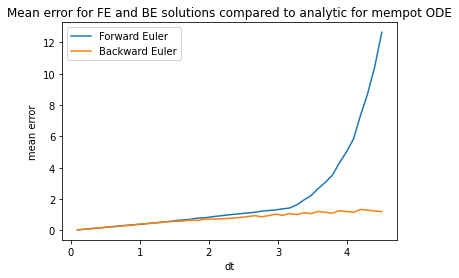

In [106]:
#ERROR ARRAY FOR FE
#Define parameters
C = .05
g = .02
VR = 60 
V0 = 100
Tmax = 50

#Let's define parameters for the time steps we will make. We'll use this to make an array of time steps to run in a for loop
dt_min = .1 #Smallet dt
dt_max = 4.5 #Largest dt 
dt_step = 44 #Number of steps between dt_min and dt_max

dt_array = np.linspace(dt_min, dt_max, dt_step) #Create an array of dt values
mean_errorFE = np.zeros(dt_step) #Create an array for mean errors 

#Now run a for loop to calculate mean errors of the numerical solution for each value of dt in dt_array
for i in np.arange(dt_step):
    dt = dt_array[i]
    t, V = forward_euler_mempot(C, g, VR, V0, dt, Tmax) #Call in Forward Euler
    y=VR + (V0-VR)*np.exp(-g*t/C) #Calculate analytic solution
    mean_errorFE[i] = np.mean(abs(V-y)) #Calculate mean error over the time interval for the given dt

    
plt.plot(dt_array,mean_errorFE, label='Forward Euler')
plt.xlabel('dt')
plt.ylabel('mean error')
plt.title('Mean error for FE and BE solutions compared to analytic for mempot ODE')


#ERROR ARRAY FOR BE

dt_array = np.linspace(dt_min, dt_max, dt_step) #Create an array of dt values
mean_errorBE = np.zeros(dt_step) #Create an array for mean errors 

#Now run a for loop to calculate mean errors of the numerical solution for each value of dt in dt_array
for i in np.arange(dt_step):
    dt = dt_array[i]
    t, V = backward_euler_mempot(C, g, VR, V0, dt, Tmax) #Call in Forward Euler
    y=VR + (V0-VR)*np.exp(-g*t/C) #Calculate analytic solution
    mean_errorBE[i] = np.mean(abs(V-y)) #Calculate mean error over the time interval for the given dt
    
plt.plot(dt_array,mean_errorBE, label='Backward Euler')

plt.legend()
plt.show()

Here, we have plotted the mean errors for Forward Euler and Backward Euler numerical solution methods compared to the analyticial solution for the Cole ODE. The mean errors are plotted over an array of dt values ranging from .1 to 4.5.

We see that as time step approaches zero, the mean errors of both Forward Euler and Backward Euler become very small and both approach zero. However, there is a divergence of the plotted mean errors when we increase the time step. As time step becomes large, Forward Euler mean errors become very large, increasing exponentially. Meanwhile, Backward Euler mean errors increase but at a much slower rate and still remain relatively small (less than 2 when dt is 4.5). Therefore, Backward Euler does a better job when time step is large. 

### 3.2 Growth of errors in solutions of logistic ODE

Let us examine how errors behave in the numeric solutions of the logistic ODE. Use your Forward Euler function for logistic model that you defined above and the same parameter values to calculate the solution and plot it over reasonable time range. Increase the timestep until you see solutions break down and behave very differently from the correct solution, plot the solutions for several time step values on the same plot to compare the behavior at a small time step value with that of a large value of dt. Report the dt value at which a dramatic change occurs. 

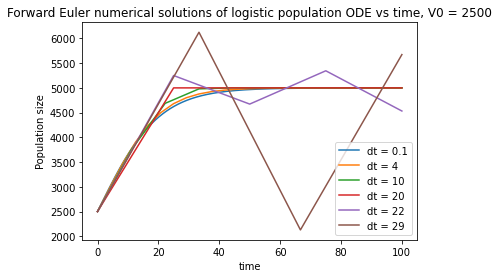

In [136]:
#FORWARD EULER for dt = 1
dt = .1 
P0 = 2500
Tmax = 100
t, P = forward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'dt = ' + str(dt))
plt.xlabel ('time')
plt.ylabel('Population size')
plt.title('Forward Euler numerical solutions of logistic population ODE vs time, V0 = 2500')

#FORWARD EULER for dt = 4
dt = 4 
P0 = 2500
Tmax = 100
t, P = forward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'dt = ' + str(dt))

#FORWARD EULER for dt = 10
dt = 10
P0 = 2500
Tmax = 100
t, P = forward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'dt = ' + str(dt))

#FORWARD EULER for dt = 20
dt = 20
P0 = 2500
Tmax = 100
t, P = forward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'dt = ' + str(dt))

#FORWARD EULER for dt = 22
dt = 22
P0 = 2500
Tmax = 100
t, P = forward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'dt = ' + str(dt))

#FORWARD EULER for dt = 33
dt = 29
P0 = 2500
Tmax = 100
t, P = forward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'dt = ' + str(dt))


plt.legend()
plt.show()


For small time steps up until dt = 20, the population size converges to the carrying capacity of 5000 and remains steady there. At around dt = 22, there is a dramatic change in which the solution begins to undergo large oscillations around the carrying capacity. These oscillations become larger and larger and the solution breaks down at dt values beyond this. 


### 3.3
Use your Backward Euler function for logistic model that you defined above and the same parameter values to calculate the solution and plot it over reasonable time range. Choose the same time steps values you chose for Foward Euler above, and make the same plot of solutions for several different values of dt. How does Backward Euler behave at higher time steps?

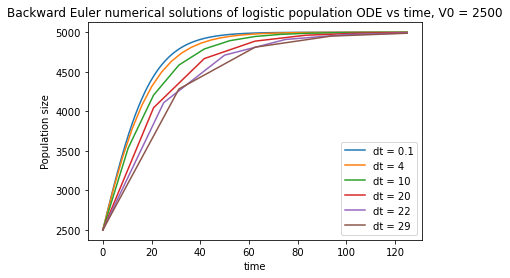

In [140]:
#BACKWARD EULER for dt = 1
dt = .1 
P0 = 2500
Tmax = 125
t, P = backward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'dt = ' + str(dt))
plt.xlabel ('time')
plt.ylabel('Population size')
plt.title('Backward Euler numerical solutions of logistic population ODE vs time, V0 = 2500')

#BACKWARD EULER for dt = 4
dt = 4 
P0 = 2500
t, P = backward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'dt = ' + str(dt))

#BACKWARD EULER for dt = 10
dt = 10
P0 = 2500
t, P = backward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'dt = ' + str(dt))

#BACKWARD EULER for dt = 20
dt = 20
P0 = 2500
t, P = backward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'dt = ' + str(dt))

#BACKWARD EULER for dt = 22
dt = 22
P0 = 2500
t, P = backward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'dt = ' + str(dt))

#BACKWARD EULER for dt = 33
dt = 29
P0 = 2500
t, P = backward_euler_logpop(r, K, P0, dt, Tmax)
plt.plot(t, P, label = 'dt = ' + str(dt))


plt.legend()
plt.show()

Backward Euler method does not break down at the large time steps we had plotted previously. Before, for dt = 29 with Forward Euler, there were huge oscillations in the final solution that caused it to be extremely different from the correct solution. Now, at the same time step for Backward Euler, the solution at large time steps still converges to the carrying capacity of 5000 individuals without oscillation. Therefore, Backward Euler approximates the correct solution much better than Forward Euler at large times steps and is more resistant to breaking down. 